In [1]:
import numpy as np
import LatticeDefinitions as ld
import GeometryFunctions as gf
import GeneralLattice as gl
import LAMMPSDump as LD
import matplotlib.pyplot as plt

In [41]:
##File format TripleLineNumber, Triple Line, Equivalent Triples Lines, Energy, Radius, Number Of Atoms
strDirectory = '/home/paul/csf3_scratch/TripleLines/data'
lstE = []
print(-3.36/(2*12.25))

-0.13714285714285715


In [37]:
lstE = []
lstN = []
for j in range(1,21):
    strFileName = strDirectory + str(j) + '/summary.data' + str(j)
    lstE.extend(np.loadtxt(strFileName,usecols=-3, delimiter= ','))
    lstN.extend(np.loadtxt(strFileName,usecols=-1, delimiter= ','))

In [38]:
lstMeanE = []
for j in range(len(lstE)):
    if lstN[j] !=0:
        lstMeanE.append(lstE[j]/lstN[j]) 



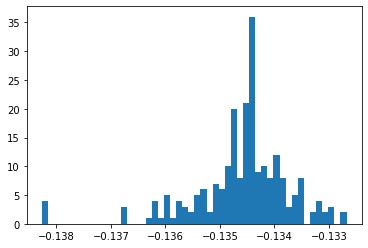

In [39]:
plt.hist(lstMeanE,bins =50);

In [14]:
lstR =[]
for j in range(1,7):
    strFileName = strDirectory + str(j) + '/SummaryData' + str(j)
    lstR.extend(np.loadtxt(strFileName, usecols=-2))
    if np.min(lstR) < -500:
        print(j)

In [22]:
lstR

[3.0374999999999996,
 6.074999999999999,
 3.0374999999999996,
 7.0874999999999995,
 7.0874999999999995,
 3.0374999999999996,
 4.05,
 4.05,
 3.0374999999999996,
 5.0625,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 4.05,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 5.0625,
 3.0374999999999996,
 3.0374999999999996,
 5.0625,
 4.05,
 5.0625,
 3.0374999999999996,
 3.0374999999999996,
 5.0625,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 5.0625,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 4.05,
 3.0374999999999996,
 4.05,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 3.0374999999999996,
 4

In [12]:
140/13

11.666666666666666